In [1]:
import numpy as np
import warnings
import matplotlib as mpl
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
warnings.filterwarnings('ignore')
plt.style.use("seaborn-poster")
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,18)

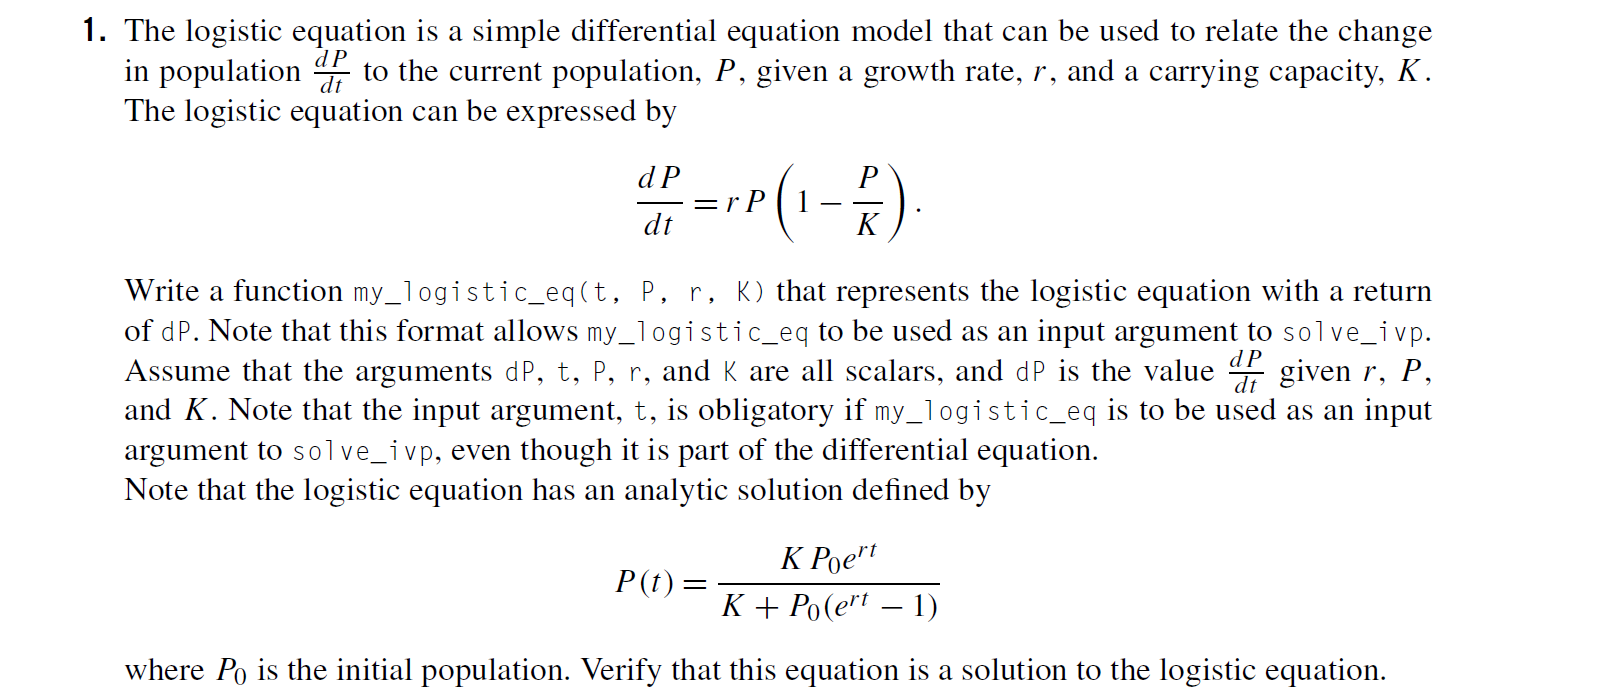

In [2]:
def my_logistic_eq(t, P, r, K):
    dP=r*P*(1-(P/K))
    return dP

dP = my_logistic_eq(0, 10, 1.1, 15)
dP

3.666666666666667

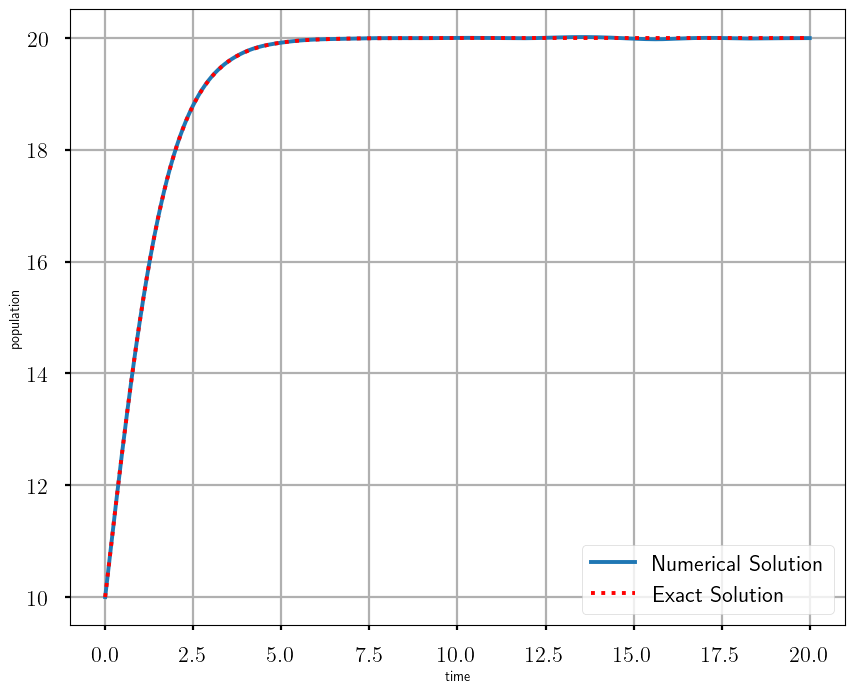

In [3]:
t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)
f = partial(my_logistic_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),"r:")
plt.xlabel("time")
plt.ylabel("population")
plt.legend(["Numerical Solution", "Exact Solution"])
plt.grid(True)
plt.show()

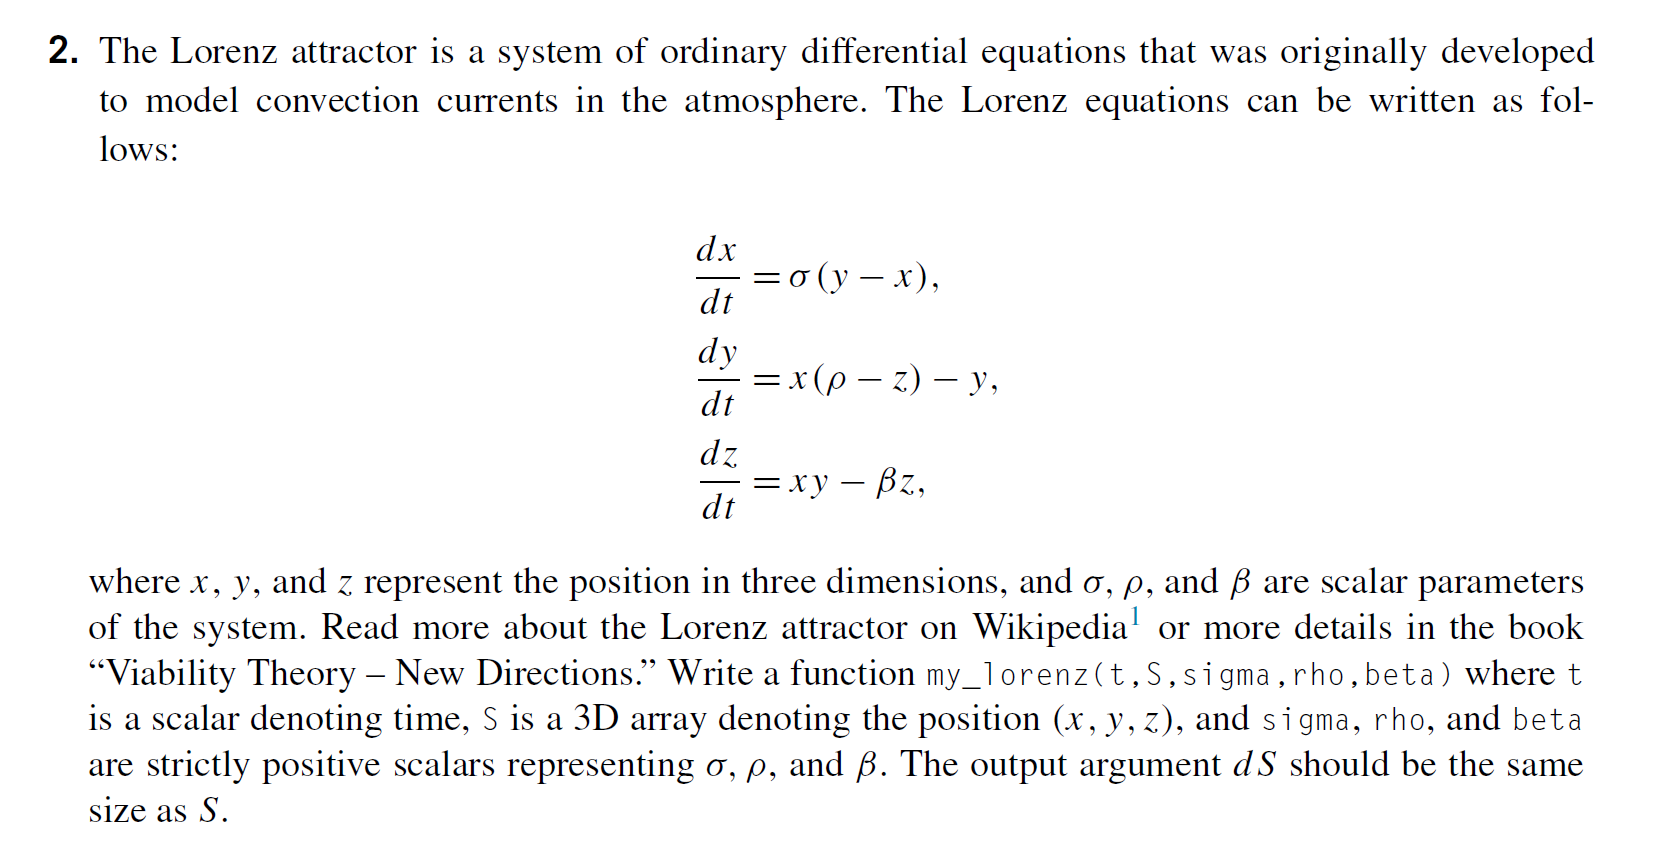

In [4]:
def my_lorenz(t, S, sigma, rho, beta):
    x,y,z=S
    dx=sigma*(y-x)
    dy=x*(rho-z)-y
    dz=x*y-beta*z
    dS=np.array([dx,dy,dz])
    return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
print(dS)

[10. 23. -6.]


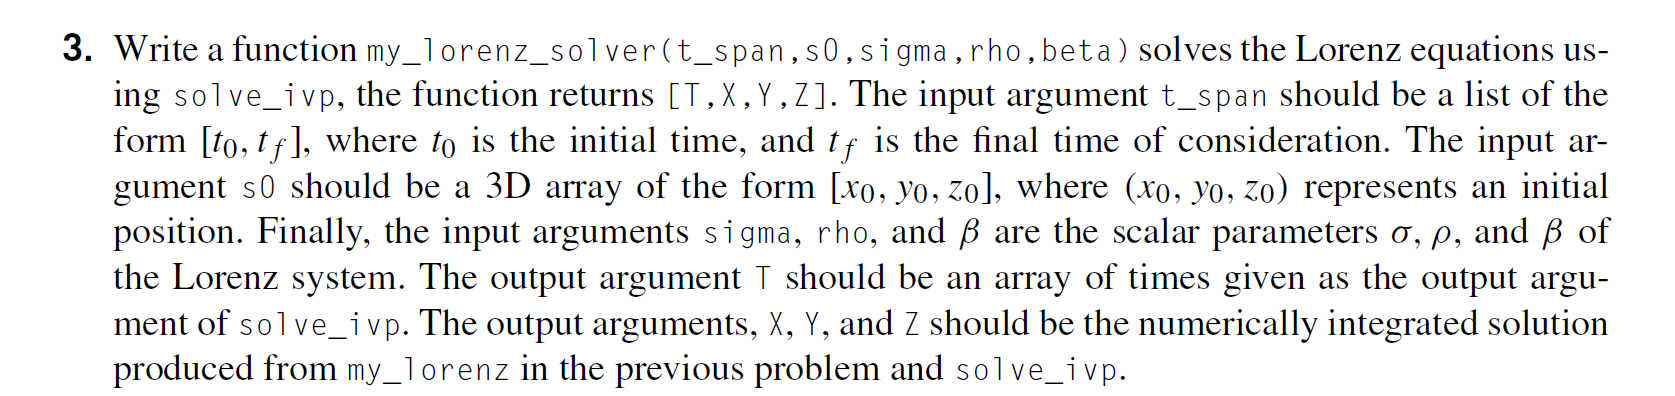

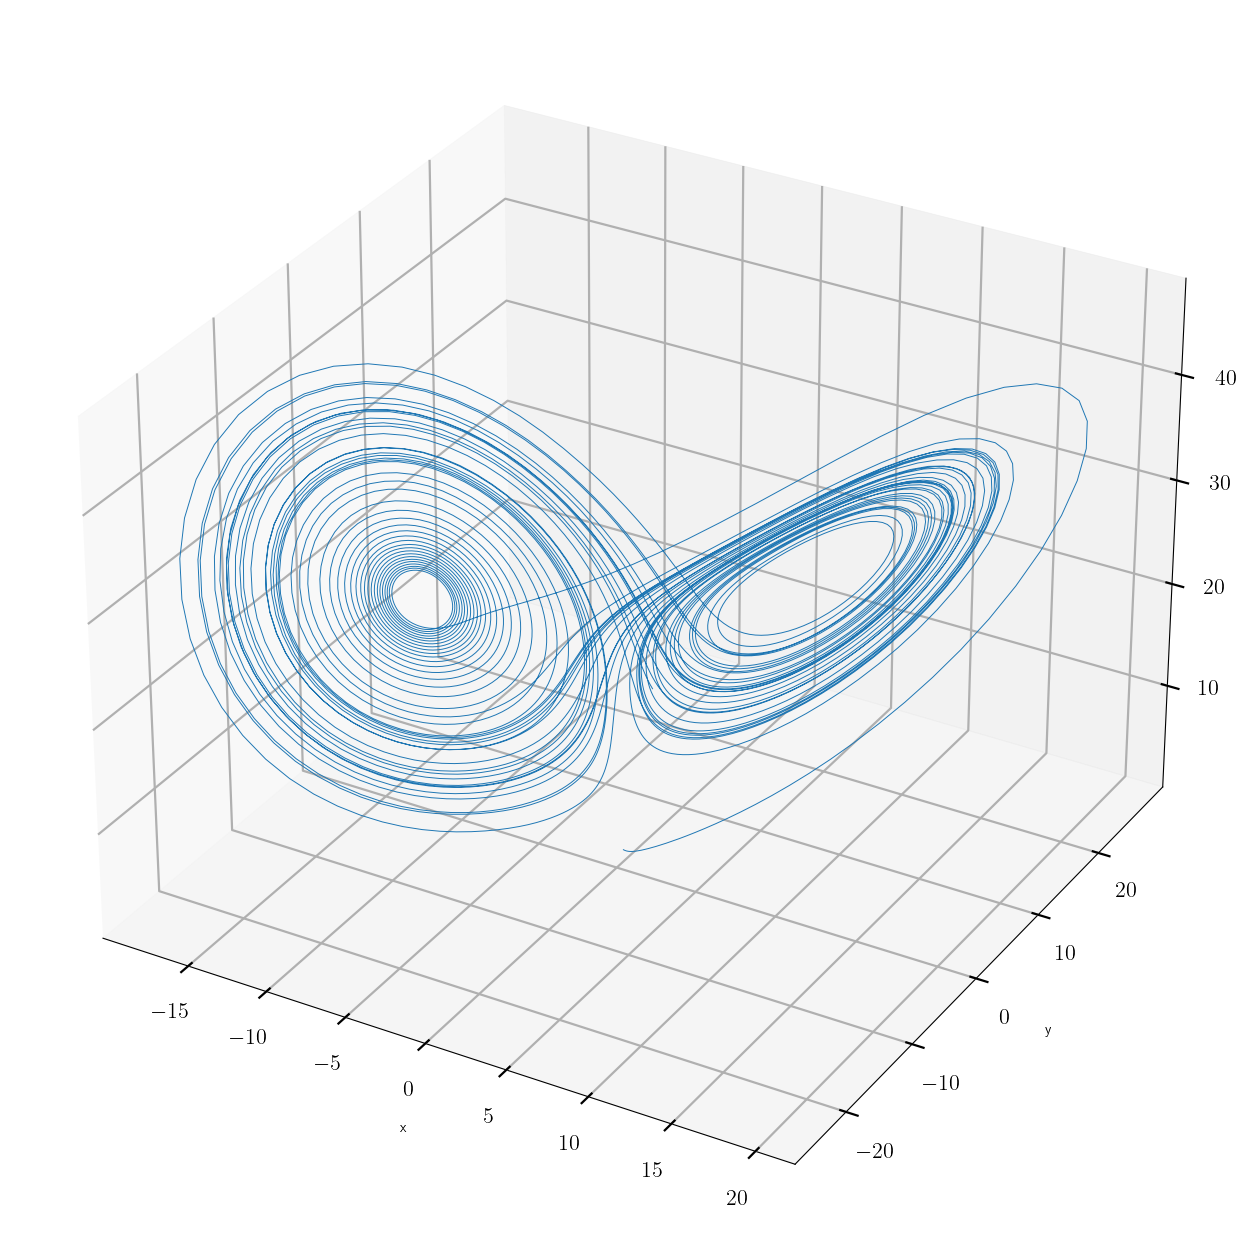

In [5]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    soln = solve_ivp(my_lorenz, t_span, s0, args=(sigma, rho, beta),dense_output=True)
    T = np.linspace(t0, tf, 5000)
    X,Y,Z = soln.sol(T)
    return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])
[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)


fig = plt.figure(figsize = (20,16))
ax = plt.axes(projection="3d")
ax.grid()
ax.plot3D(X, Y, Z,lw=0.7)
# Set axes label
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)
plt.show()

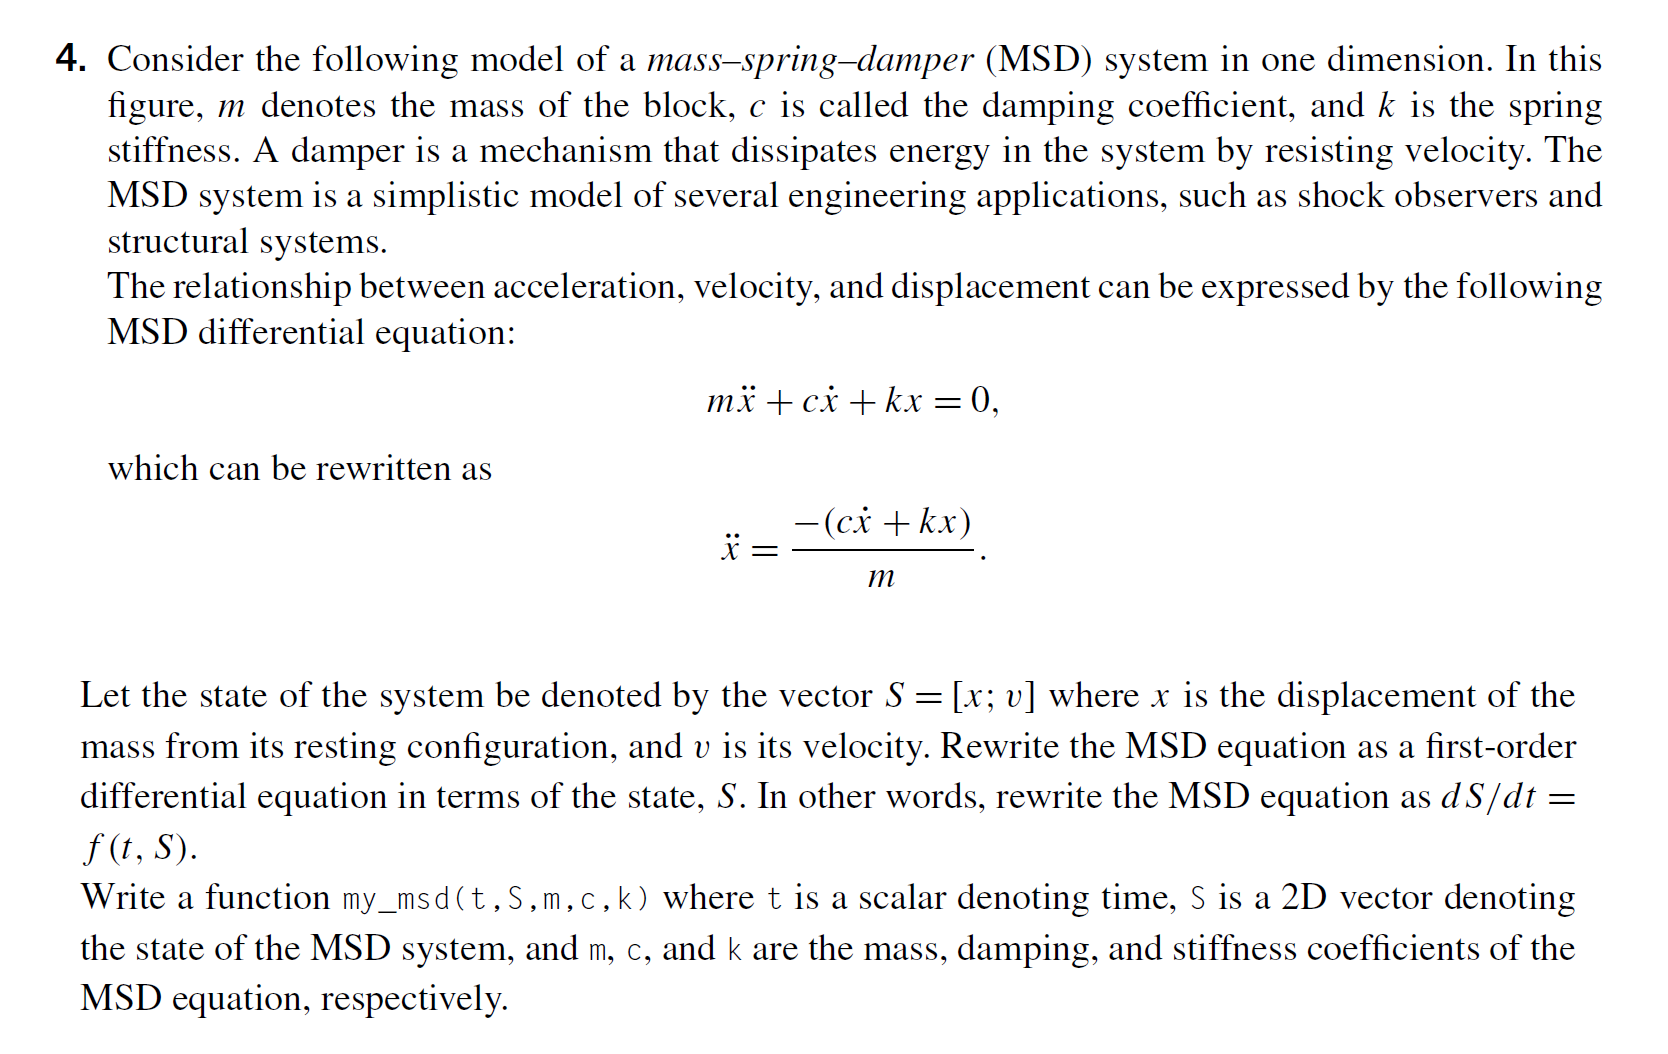

In [6]:
def my_msd(t, S, m, c, k):
    x,v=S
    a=-(c*v+k*x)/m
    ds=np.array([v,a])
    return ds
my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

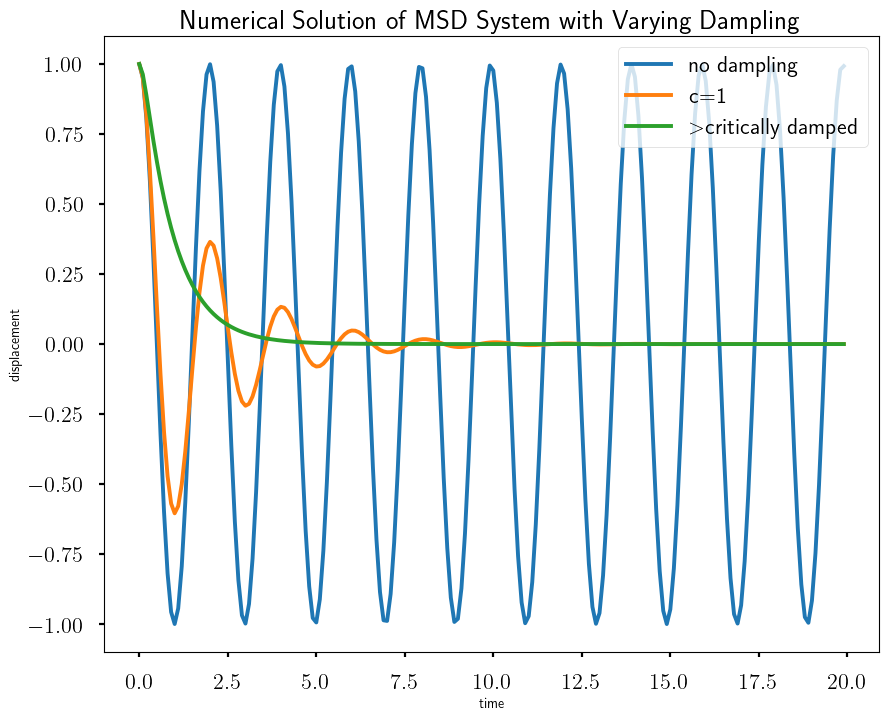

In [7]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)
plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", "$>$critically damped"], loc=1)

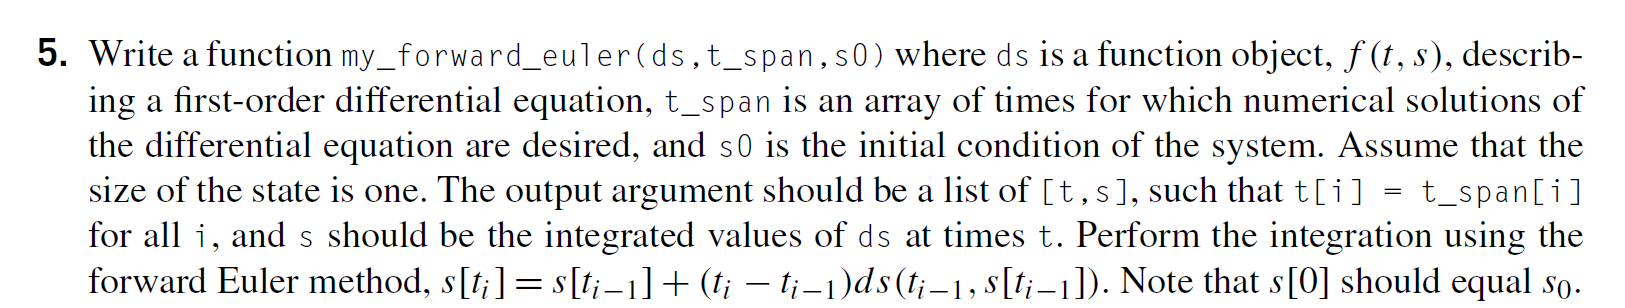

In [8]:
def my_forward_euler(ds, t_span, s0):
    n=len(t_span)
    s = np.zeros(n)
    s[0] = s0
    t = t_span 
    for i in range(0, n-1 ):
        s[i+1] = s[i] + (t_span[i]-t_span[i-1])*ds(t[i], s[i])
    return [t,s]

In [9]:
t_span = np.linspace(0, 1, 10)
s0 = 1
# Define parameters
f = lambda t, s: t*np.exp(-s)
t_eul, s_eul = my_forward_euler(f, t_span, s0)
print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


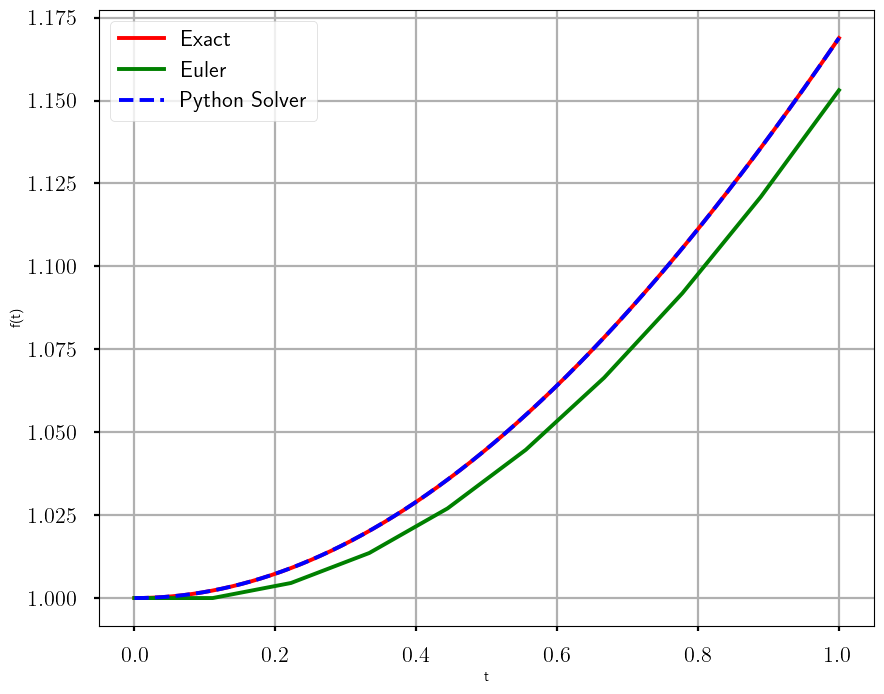

In [10]:
plt.figure(figsize = (10, 8))
# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, "r-", label="Exact")
# Forward Euler
plt.plot(t_eul, s_eul, "g-", label="Euler")
# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()

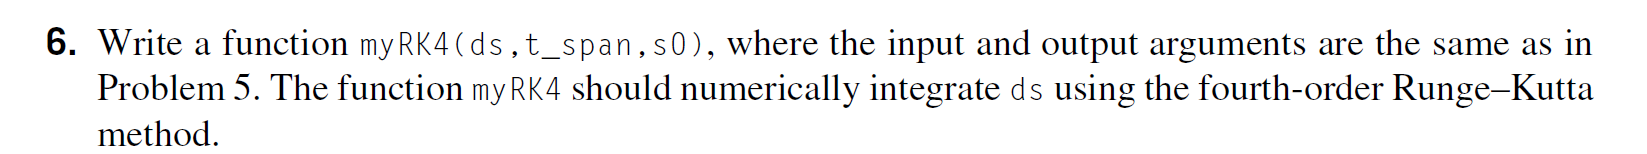

In [11]:
def myRK4(ds, t_span, s0):
    n=len(t_span)
    s = np.zeros(n)
    s[0] = s0
    t = t_span
    h=t[1]-t[0]
    for i in range(0, n-1 ):
        k1=ds(t[i],s[i])
        k2=ds(t[i]+(h/2),s[i]+(h*k1/2))
        k3=ds(t[i]+(h/2),s[i]+(h*k2/2))
        k4=ds(t[i]+h,s[i]+h*k3)
        s[i+1] = s[i] + (h/6)*(k1+2*k2+2*k3+k4)
    return [t, s]

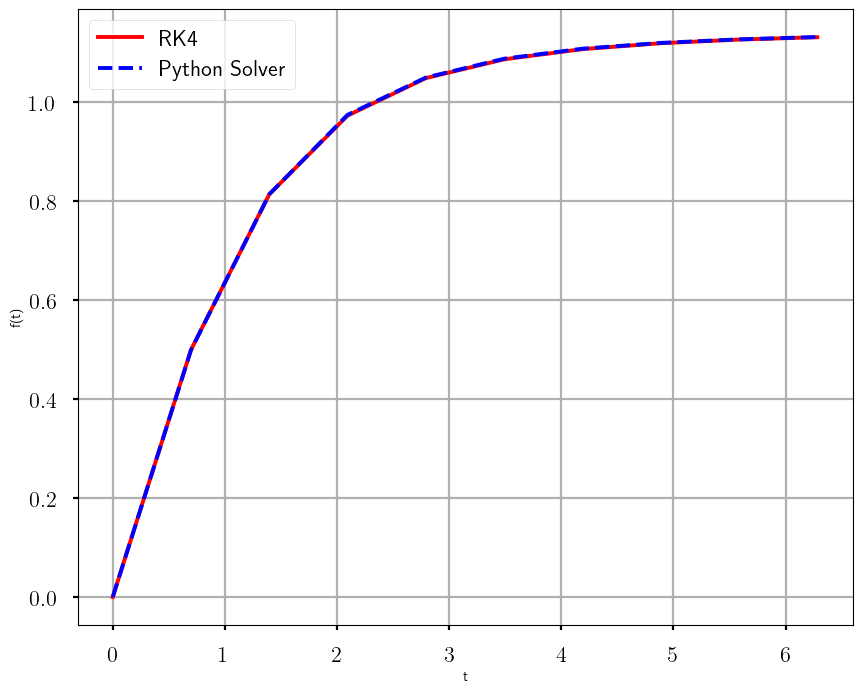

In [12]:
f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0
plt.figure(figsize = (10, 8))
# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, "r", label="RK4")
# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()

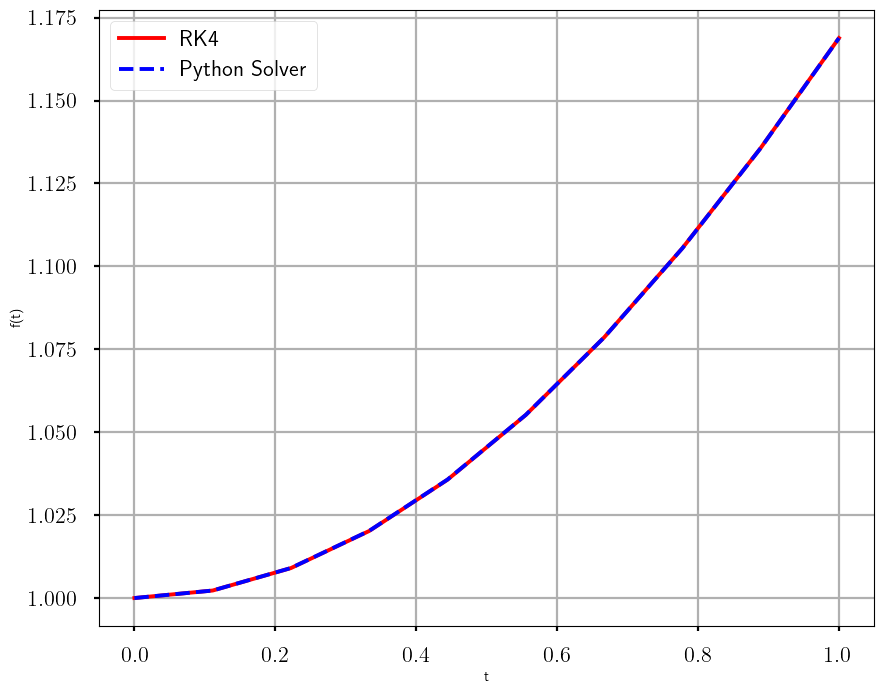

In [13]:
t_span = np.linspace(0, 1, 10)
s0 = 1
# Define parameters
f = lambda t, s: t*np.exp(-s)
plt.figure(figsize = (10, 8))
# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, "r", label="RK4")
# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()